In [1]:
#libraries for EDA
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load data
def data():
    locations = ['ajah', 'lekki', 'ogba', 'ikeja', 'iyana ipaja', 'yaba', 'gbagada', 'ikorodu', 'surulere',]
    data = []
    for location in locations:
        data.append(pd.read_csv('C:\\Users\\AONU\\Downloads\\House Price App\\Data\\'+location+'.csv'))
    return data
data = data()

In [3]:
#display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
#concat dataframes
df = pd.concat([data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8]] , axis =0, join ='outer')
df = df.reset_index().drop(['index'],1)
df.tail()

,Specific Location,Amenities,Bedroom,Bathroom,Toilet,Price,Description,Location
4010,off ogunsanya bode thomas surulere lagos,3 bed 3 bath 4 toilet,3.0,3.0,4.0,2800000,TASTEFULLY Finished 2units of 3bedroom flat SE...,surulere
4011,off ogunsanya bode thomas surulere lagos,2 bed 2 bath 3 toilet,2.0,2.0,3.0,2500000,TASTEFULLY Finished 2units of 3bedroom flat SE...,surulere
4012,iseyin off adeshina ijesha surulere lagos,3 bed 4 bath 4 toilet,3.0,4.0,4.0,1000000,Luvly and spacious 3bed @ iseyin street off ad...,surulere
4013,ibudun western avenue surulere lagos,1 bed 1 bath 1 toilet,1.0,1.0,1.0,450000,Mini flat for rent @ibidun Surulere off Wester...,surulere
4014,olufemi ogunlana surulere lagos,3 bed 2 bath 3 toilet,3.0,2.0,3.0,1300000,Newly renovated 3bedroom flat all rooms ensuit...,surulere


In [5]:
#unique locations
df['Location'].unique()

array(['ajah', 'lekki', 'ogba', 'ikeja', 'iyana ipaja', 'yaba', 'gbagada',
       'ikorodu', 'surulere'], dtype=object)

In [6]:
#checking null values
df.isnull().sum()

Specific Location      0
Amenities              0
Bedroom              400
Bathroom             404
Toilet               374
Price                  0
Description            0
Location               0
dtype: int64

In [7]:
#summary statistics
df.describe()

,Bedroom,Bathroom,Toilet
count,3615.000000,3611.000000,3641.000000
mean,2.659751,2.587649,3.082120
std,1.385103,1.525500,1.785661
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,9.000000,9.000000,9.000000


In [8]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Specific Location  4015 non-null   object 
 1   Amenities          4015 non-null   object 
 2   Bedroom            3615 non-null   float64
 3   Bathroom           3611 non-null   float64
 4   Toilet             3641 non-null   float64
 5   Price              4015 non-null   object 
 6   Description        4015 non-null   object 
 7   Location           4015 non-null   object 
dtypes: float64(3), object(5)
memory usage: 251.1+ KB


In [9]:
#drop misssing columns
df.dropna(inplace=True)

In [10]:
#format data type
df['Bathroom'] = df['Bathroom'].apply(int)
df['Toilet'] = df['Toilet'].apply(int)
df['Bedroom'] = df['Toilet'].apply(int)
df['Price'] = df['Price'].replace('[\₦,$]', '', regex=True)
df['Price'] = df['Price'].apply(int)

In [11]:
#create feature
df['Amenities'] = df['Bathroom']+ df['Toilet']

In [12]:
#create feature
sw = '|'.join(['new','almost completed','almost complete'])
cond_new = df['Description'].str.lower().str.contains(sw) 
df['New'] = np.where(cond_new, 1, 0)
print(df['New'].value_counts())

0    2036
1    1498
Name: New, dtype: int64


In [13]:
#create feature
sw = '|'.join(['detach','detached','dettached','terrace','duplex'])
cond_dup = df['Description'].str.lower().str.contains(sw) 
df['Duplex'] = np.where(cond_dup, 1, 0)
print(df['Duplex'].value_counts())


0    2596
1     938
Name: Duplex, dtype: int64


In [14]:
#create feature
sw = '|'.join(['ensuite','service','exqui'])
cond_lux = df['Description'].str.lower().str.contains(sw) 
df['Lux'] = np.where(cond_lux, 1, 0)
print(df['Lux'].value_counts())


0    2075
1    1459
Name: Lux, dtype: int64


In [15]:
#create feature
sw = '|'.join(['estate','crescent','phase', 'medina'])
cond_es = df['Description'].str.lower().str.contains(sw)  
df['Estate'] = np.where(cond_es, 1, 0)
print(df['Estate'].value_counts())

0    2377
1    1157
Name: Estate, dtype: int64


In [16]:
#re-arranging
target_col = ['Price']
df = df[[c for c in df if c not in target_col] + [c for c in target_col if c in df]]
df.head()

,Specific Location,Amenities,Bedroom,Bathroom,Toilet,Description,Location,New,Duplex,Lux,Estate,Price
0,"6, abimbola owodunni close, seaside estate, ...",7,4,3,4,Ground floor flat in a block of six flats of 3...,ajah,1,0,1,0,1200000
1,badore ajah lagos,9,5,4,5,"4 Bedroom Terraced Duplex at Unity Estate, Bad...",ajah,1,1,1,1,1250000
2,lekki palm city ajah lagos,11,6,5,6,FOR RENT: Brand New and Tastefully finished 4 ...,ajah,1,1,0,1,2300000
3,- thomas estate ajah lagos,9,5,4,5,Nicely Built Four Bedroom Fully Detached Duple...,ajah,1,1,0,1,50000000
4,ajah lagos,9,5,4,5,Lovely 4 Bedroom Semi-Detached House in Palm C...,ajah,0,1,0,0,2800000


In [17]:
#drop rows with incomplete information
to_drop = df[(df['Bedroom']==0) | (df['Toilet']==0) | (df['Bathroom']==0)]
to_drop1 =df[df['Bedroom']>=9]
df.drop(to_drop.index, 0 , inplace=True)
df.drop(to_drop1.index, 0 , inplace=True)

In [466]:
#copy data
df1 = df.copy()

In [467]:
#adjust ajah outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ajah') & (df1['Price']>1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ajah') & (df1['Price']<400000)), 400000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ajah') & (df1['Price']>1300000)), 1300000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ajah') & (df1['Price']<800000)), 800000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ajah') & (df1['Price']>2300000)), 2300000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ajah') & (df1['Price']<900000)), 900000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ajah') & (df1['Price']<1200000)), 1200000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ajah') & (df1['Price']>3000000)), 3000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='ajah') & (df1['Price']<3000000)), 3000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='ajah') & (df1['Price']>5000000)), 5000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='ajah') & (df1['Price']<4000000)), 4000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='ajah') & (df1['Price']>5000000)), 5000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='ajah') & (df1['Price']<5000000)), 5000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='ajah') & (df1['Price']>6000000)), 6000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='ajah') & (df1['Price']<5500000)), 5500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='ajah') & (df1['Price']>7000000)), 7000000, df1['Price'])

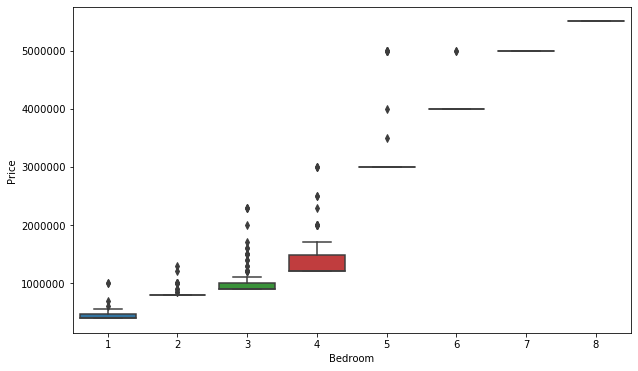

In [468]:
#box plot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='ajah'])
plt.show()

In [469]:
#adjust lekki outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='lekki') & (df1['Price']>2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='lekki') & (df1['Price']<400000)), 400000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='lekki') & (df1['Price']>3000000)), 3000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='lekki') & (df1['Price']<900000)), 900000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='lekki') & (df1['Price']>3500000)), 3500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='lekki') & (df1['Price']<1000000)), 1000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='lekki') & (df1['Price']<2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='lekki') & (df1['Price']>4300000)), 4300000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='lekki') & (df1['Price']<3500000)), 3500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='lekki') & (df1['Price']>5600000)), 5600000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='lekki') & (df1['Price']<4700000)), 4700000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='lekki') & (df1['Price']>6200000)), 6200000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='lekki') & (df1['Price']<5500000)), 5500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='lekki') & (df1['Price']>6800000)), 6800000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='lekki') & (df1['Price']<6500000)), 6500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='lekki') & (df1['Price']>7000000)), 7000000, df1['Price'])


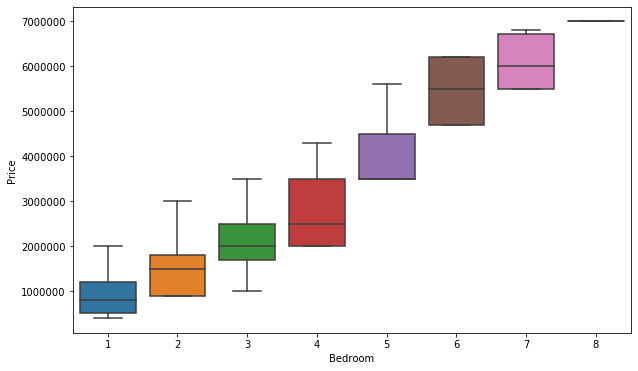

In [470]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='lekki'])
plt.show()

In [471]:
#adjusting ikeja outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ikeja') & (df1['Price']>1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ikeja') & (df1['Price']<400000)), 400000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ikeja') & (df1['Price']>2200000)), 2200000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ikeja') & (df1['Price']<800000)), 800000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ikeja') & (df1['Price']>3500000)), 3500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ikeja') & (df1['Price']<900000)), 900000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ikeja') & (df1['Price']<2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ikeja') & (df1['Price']>4000000)), 4000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='ikeja') & (df1['Price']<3500000)), 3500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='ikeja') & (df1['Price']>5500000)), 5500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='ikeja') & (df1['Price']<4700000)), 4700000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==6) & (df1['Location']=='ikeja') & (df1['Price']>6200000)), 6200000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='ikeja') & (df1['Price']<5500000)), 5500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==7) & (df1['Location']=='ikeja') & (df1['Price']>6800000)), 6800000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='ikeja') & (df1['Price']<6500000)), 6500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==8) & (df1['Location']=='ikeja') & (df1['Price']>7000000)), 7000000, df1['Price'])




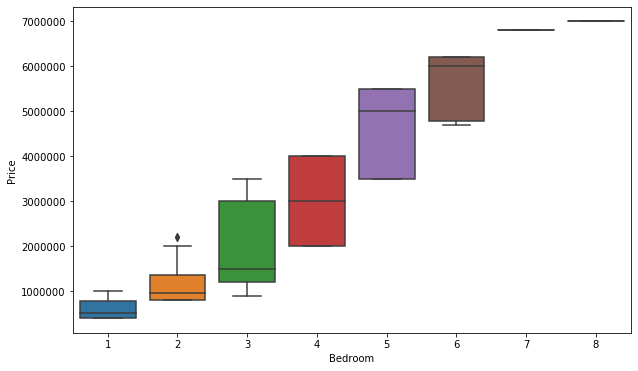

In [472]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='ikeja'])
plt.show()

In [473]:
#gbagada outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='gbagada') & (df1['Price']>700000)), 700000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='gbagada') & (df1['Price']<300000)), 300000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='gbagada') & (df1['Price']>1500000)), 1500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='gbagada') & (df1['Price']<500000)), 500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='gbagada') & (df1['Price']>1800000)), 1800000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='gbagada') & (df1['Price']<700000)), 700000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='gbagada') & (df1['Price']<1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='gbagada') & (df1['Price']>2500000)), 2500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='gbagada') & (df1['Price']<2500000)), 2500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='gbagada') & (df1['Price']>4000000)), 4000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='gbagada') & (df1['Price']<3000000)), 3000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='gbagada') & (df1['Price']>4700000)), 4700000, df1['Price'])

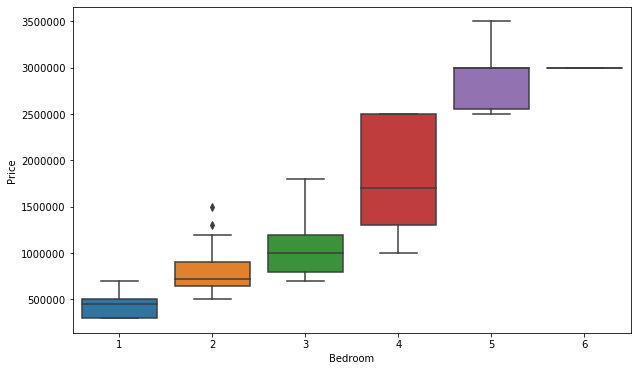

In [474]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='gbagada'])
plt.show()

In [475]:
#adjusting ogba outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ogba') & (df1['Price']>500000)), 500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ogba') & (df1['Price']>800000)), 800000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ogba') & (df1['Price']<400000)), 400000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ogba') & (df1['Price']>1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ogba') & (df1['Price']<500000)), 500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ogba') & (df1['Price']<700000)), 700000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ogba') & (df1['Price']>1300000)), 1300000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']>=5) & (df1['Location']=='ogba') & (df1['Price']<1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']>=5) & (df1['Location']=='ogba') & (df1['Price']>1500000)), 1500000, df1['Price'])

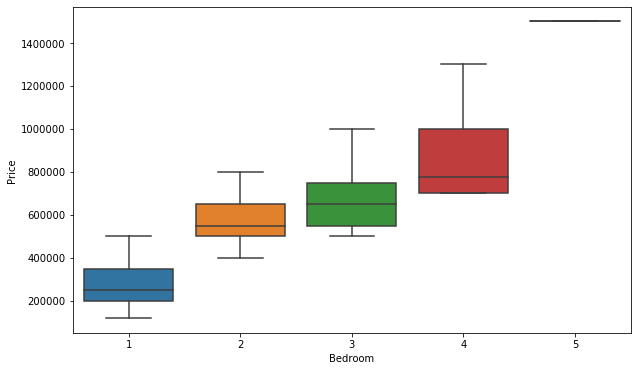

In [476]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='ogba'])
plt.show()

In [477]:
#adjusting yaba outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='yaba') & (df1['Price']>600000)), 600000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='yaba') & (df1['Price']<300000)), 300000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='yaba') & (df1['Price']>1300000)), 1300000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='yaba') & (df1['Price']<500000)), 500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='yaba') & (df1['Price']>1800000)), 1800000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='yaba') & (df1['Price']<700000)), 700000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='yaba') & (df1['Price']<1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='yaba') & (df1['Price']>2500000)), 2500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='yaba') & (df1['Price']<2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='yaba') & (df1['Price']>3500000)), 3500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='yaba') & (df1['Price']<3000000)), 3000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='yaba') & (df1['Price']>4700000)), 4700000, df1['Price'])


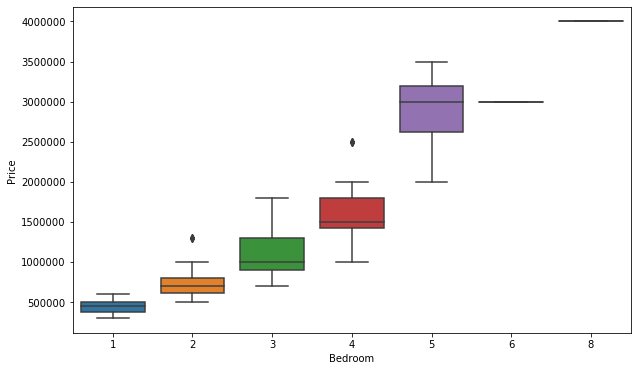

In [478]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='yaba'])
plt.show()

In [479]:
#adjusting surulere outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='surulere') & (df1['Price']>700000)), 700000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='surulere') & (df1['Price']<300000)), 300000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='surulere') & (df1['Price']>1500000)), 1500000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='surulere') & (df1['Price']<500000)), 500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='surulere') & (df1['Price']>2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='surulere') & (df1['Price']<700000)), 700000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='surulere') & (df1['Price']<1000000)), 1000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='surulere') & (df1['Price']>3000000)), 3000000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='surulere') & (df1['Price']<2000000)), 2000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==5) & (df1['Location']=='surulere') & (df1['Price']>3500000)), 3500000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='surulere') & (df1['Price']<3000000)), 3000000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']>=6) & (df1['Location']=='surulere') & (df1['Price']>4000000)), 4000000, df1['Price'])

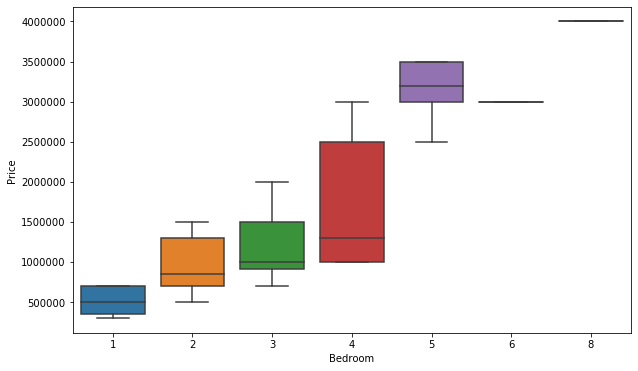

In [480]:
#box plot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='surulere'])
plt.show()

In [481]:
#adjusting iyana ipaja outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='iyana ipaja') & (df1['Price']>300000)), 300000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='iyana ipaja') & (df1['Price']<90000)), 90000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='iyana ipaja') & (df1['Price']<500000)), 500000, df1['Price'])

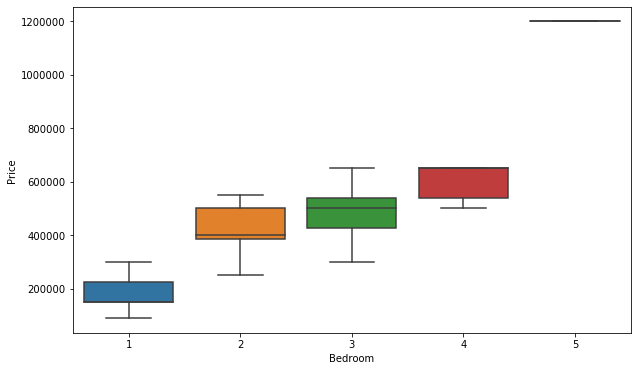

In [482]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='iyana ipaja'])
plt.show()

In [483]:
#adjusting ikorodu outliers
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ikorodu') & (df1['Price']>300000)), 300000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==1) & (df1['Location']=='ikorodu') & (df1['Price']<80000)), 80000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ikorodu') & (df1['Price']>600000)), 600000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==2) & (df1['Location']=='ikorodu') & (df1['Price']<100000)), 100000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ikorodu') & (df1['Price']>900000)), 900000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==3) & (df1['Location']=='ikorodu') & (df1['Price']<200000)), 200000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ikorodu') & (df1['Price']<400000)), 400000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']==4) & (df1['Location']=='ikorodu') & (df1['Price']>1200000)), 1200000, df1['Price'])

df1['Price']  = np.where(((df1['Bedroom']>=5) & (df1['Location']=='ikorodu') & (df1['Price']<800000)), 800000, df1['Price'])
df1['Price']  = np.where(((df1['Bedroom']>=5) & (df1['Location']=='ikorodu') & (df1['Price']>1500000)), 1500000, df1['Price'])

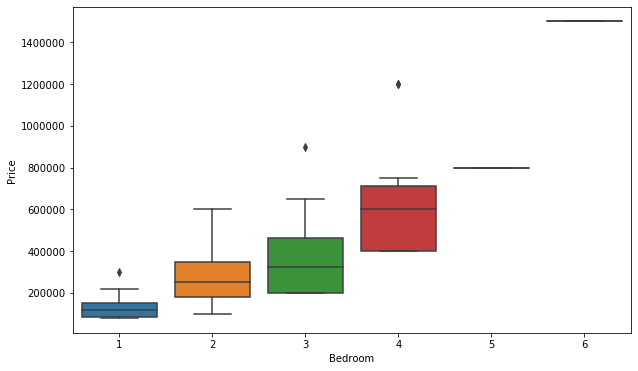

In [484]:
#boxplot
fig = plt.figure(figsize=(10,6))
sns.boxplot('Bedroom', 'Price', data=df1[df1['Location']=='ikorodu'])
plt.show()


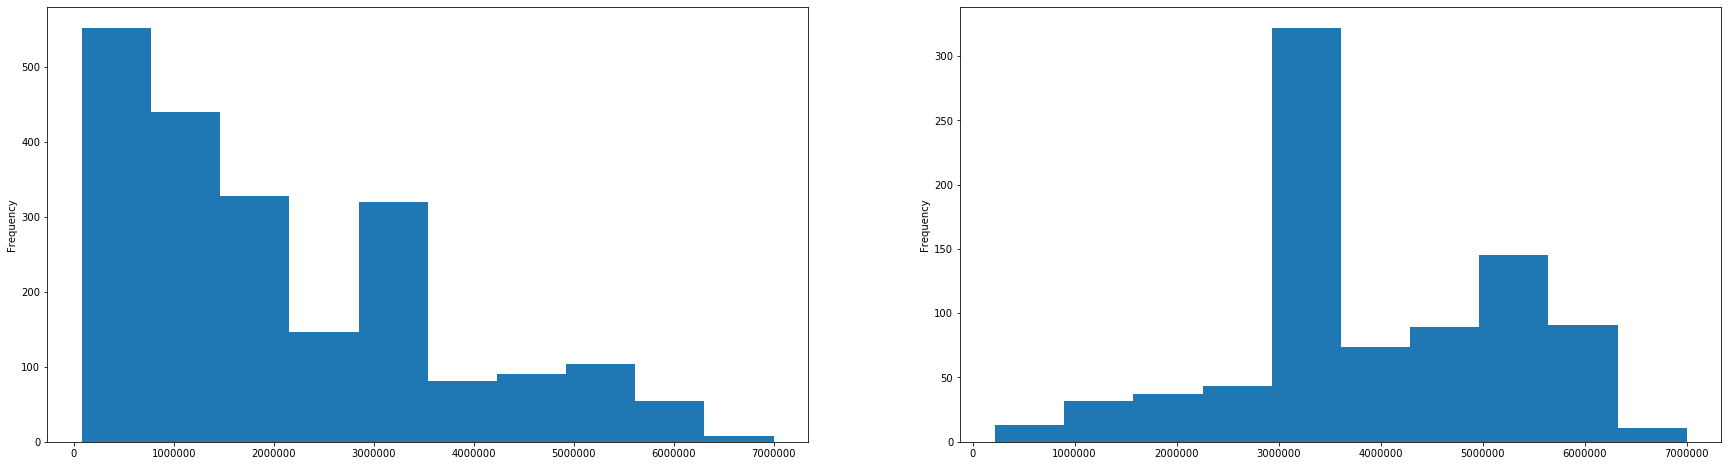

In [485]:
#inspect houses with special feature
fig = plt.figure(figsize=(30,8))
fig.add_subplot(1, 2, 1)
df1['Price'][df1['Estate']==0].plot(kind = "hist")

fig.add_subplot(1, 2, 2)
df1['Price'][df1['Duplex']==1].plot(kind = "hist")

plt.show()

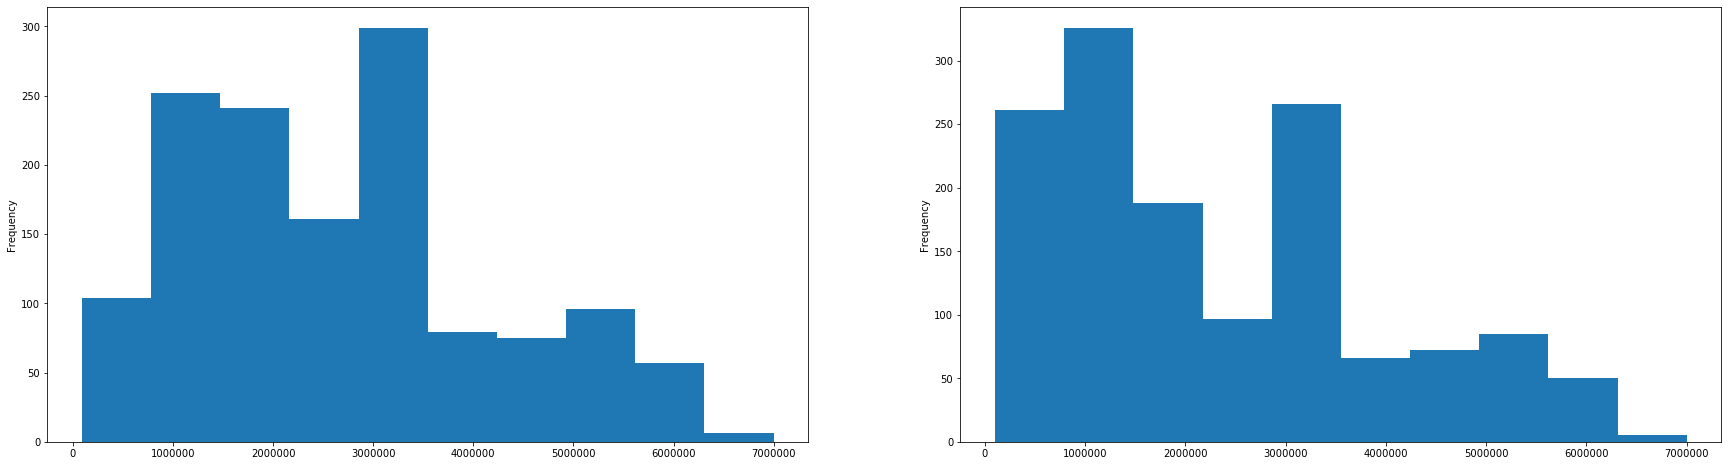

In [486]:
#inspect houses with special feature
fig = plt.figure(figsize=(30,8))

fig.add_subplot(1, 2, 1)
df1['Price'][df1['Lux']==1].plot(kind = "hist")

fig.add_subplot(1, 2, 2)
df1['Price'][df1['New']==1].plot(kind = "hist")

plt.show()

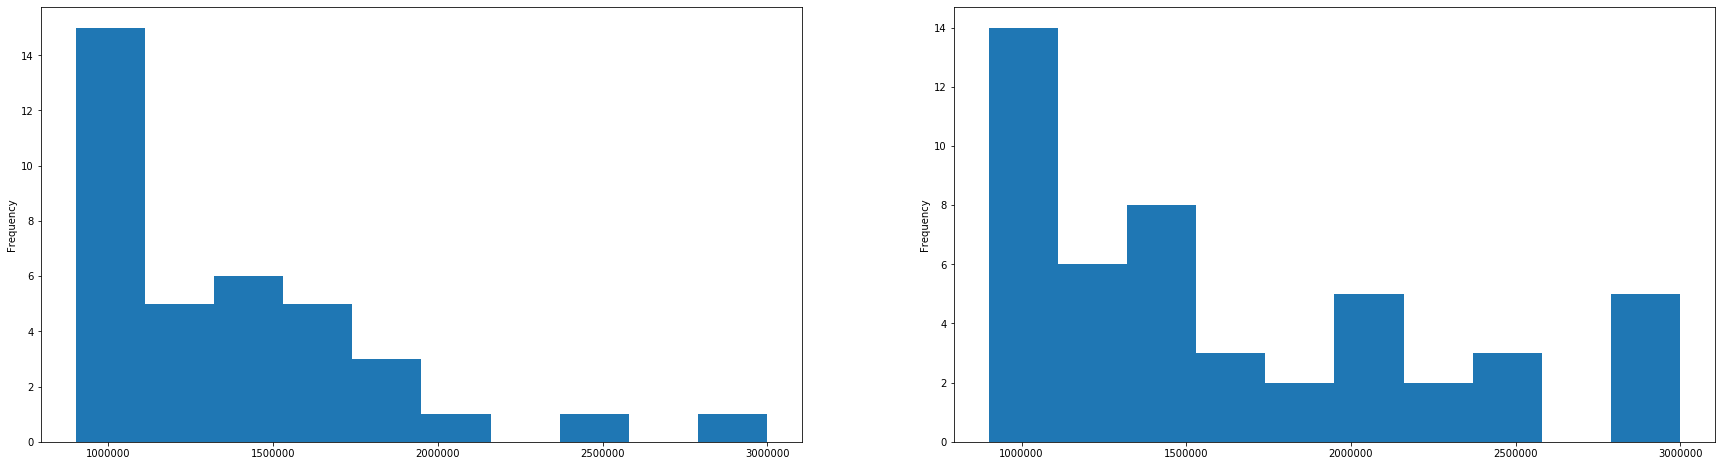

In [487]:
#inspect houses with special feature
fig = plt.figure(figsize=(30,8))

fig.add_subplot(1, 2, 1)
df1['Price'][(df1['New']==1) & (df1['Location']=='lekki') & (df1['Bedroom']==2) ].plot(kind = "hist")

fig.add_subplot(1, 2, 2)
df1['Price'][(df1['New']==0) & (df1['Location']=='lekki')& (df1['Bedroom']==2) ].plot(kind = "hist")
plt.show()

In [488]:
#handling wrong information based on the price percentiles
estate_price = []
import numpy as np
for location in ["ajah","lekki","ikeja","ogba","ikorodu","iyana ipaja","gbagada","surulere","yaba"]:
    for i in range(1,9):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(df1['Price'][(df1['Location']==location)&(df1['Bedroom']==i)],50)
            d['terraced_price'] = np.percentile(df1['Price'][(df1['Location']==location)&(df1['Bedroom']==i)],80)
            d['new_price'] = np.percentile(df1['Price'][(df1['Location']==location)&(df1['Bedroom']==i)],70)
        except (IndexError,TypeError) as e:
            d['terraced_price'] = 0
            d['estate_price'] = 0
            d['new_price'] = 0
        estate_price.append(d)

In [489]:
#make data frame
estate_price=pd.DataFrame(estate_price)
estate_price['locationbed'] = estate_price['location'] + estate_price['bedspace'].astype(str)
estate_price = estate_price.drop(["location","bedspace"],axis=1)

In [490]:
#merge to original dataframe to create new dataframe
df1['locationbed']  = df1['Location'] + df1['Bedroom'].astype(str)
df2 = pd.merge(df1,estate_price, on ="locationbed", how = "left")

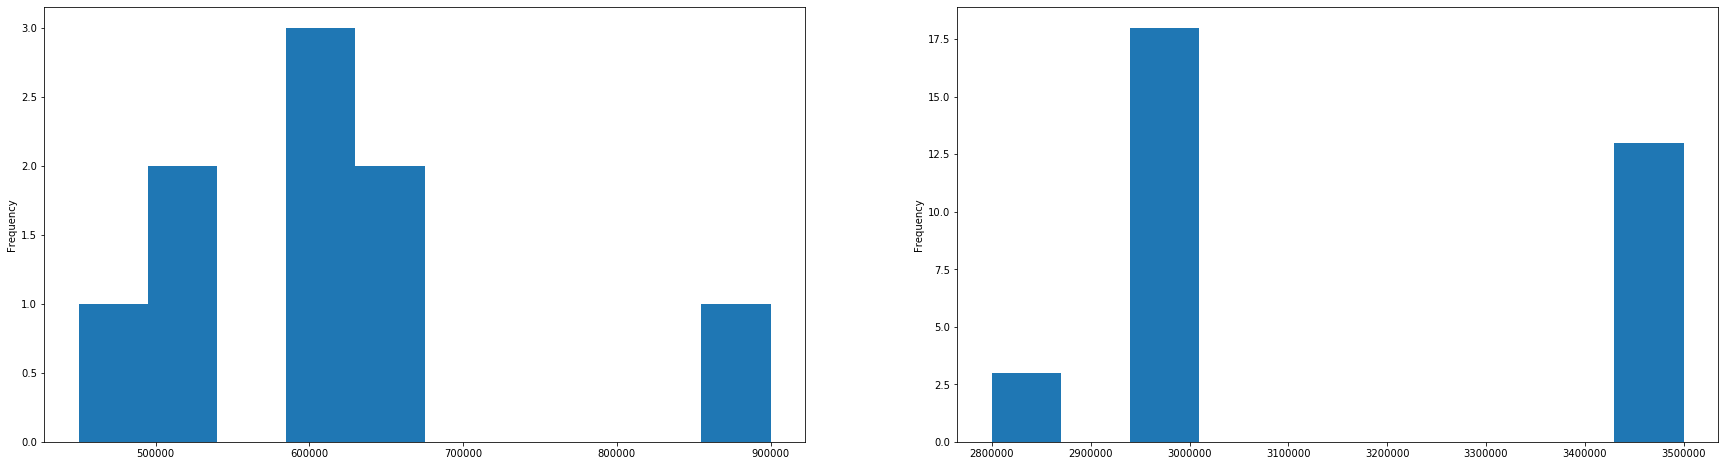

In [570]:
#inspect houses with special feature
fig = plt.figure(figsize=(30,8))

fig.add_subplot(1, 2, 1)
df2['Price'][(df2['Lux']==1) & (df2['Location']=='ikorodu') & (df2['Bedroom']==3) ].plot(kind = "hist")

fig.add_subplot(1, 2, 2)
df2['Price'][(df2['Lux']==1) & (df2['Location']=='lekki')& (df2['Bedroom']==3) ].plot(kind = "hist")
plt.show()

In [492]:
#re-assign feature tags
df2['Estate']  = np.where((df2['Price'] >= df2['estate_price']) , 1, 0)
df2['Duplex']  = np.where((df2['Price'] >= df2['terraced_price']) , 1, 0)
df2['New']  = np.where((df2['Price'] >= df2['new_price']) , 1 , 0)
df2['Lux']  = np.where((df2['Price'] >= 1.1*df2['new_price']) , 1 , 0)

In [493]:
#creating feature
df2['value'] = df2['Lux'] + df2['New'] + df2['Estate'] + df2['Duplex'] 
print(df2['value'].value_counts() )

1    963
0    911
4    563
3    482
2    245
Name: value, dtype: int64


In [496]:
#rank house price by location
g = df1.groupby(['Location','Bedroom'])['Price'].median().reset_index().sort_values('Price')
g['location_rank']= g['Price'].rank()
g['location_rank'] = g['location_rank'].astype(int)
g['locationbed'] = g['Location'] + g ['Bedroom'].astype(str)
g = g.drop(["Price","Location","Bedroom"],axis=1)
df2 = pd.merge(df2,g, on ="locationbed", how = "left")

In [497]:
#group location rank
df2['rank'] = pd.cut(df2['location_rank'], 10 , labels=list(range(1,11)))
df2['rank'] = df2['rank'].astype('int64')

In [534]:
rank_dict = dict(df2.groupby('locationbed')['rank'].median())

In [535]:
estate_price_dict = dict(df2.groupby('locationbed')['estate_price'].median())

In [541]:
new_price_dict = dict(df2.groupby('locationbed')['new_price'].median())

In [539]:
terraced_price_dict = dict(df2.groupby('locationbed')['terraced_price'].median())

In [515]:
#re-arranging column
target_col = ['Price']
df2 = df2[[c for c in df2 if c not in target_col] + [c for c in target_col if c in df2]]
df2.head(2)

,Specific Location,Amenities,Bedroom,Bathroom,Toilet,Description,Location,New,Duplex,Lux,Estate,locationbed,estate_price,terraced_price,new_price,value,location_rank,rank,Price
0,"6, abimbola owodunni close, seaside estate, ...",7,4,3,4,Ground floor flat in a block of six flats of 3...,ajah,0,0,0,1,ajah4,1200000.0,1500000.0,1300000.0,1,29,5,1200000
1,badore ajah lagos,9,5,4,5,"4 Bedroom Terraced Duplex at Unity Estate, Bad...",ajah,1,1,0,1,ajah5,3000000.0,3000000.0,3000000.0,3,43,8,3000000


In [516]:
df3 = df2.copy()

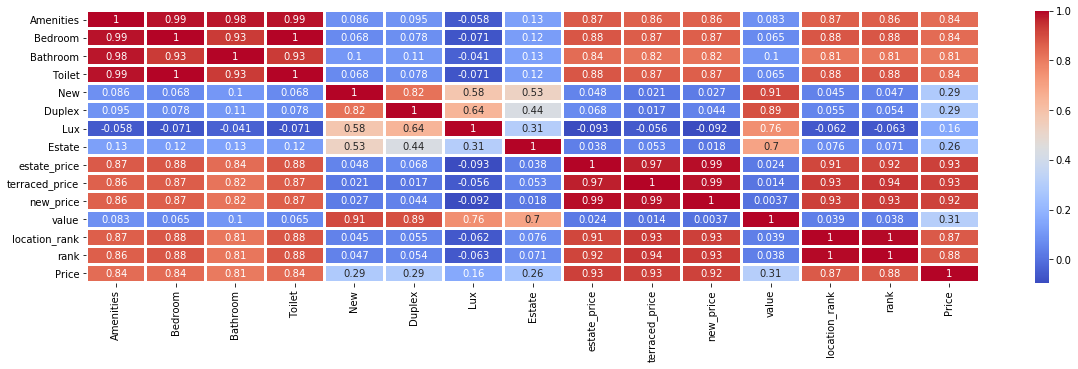

In [517]:
corr = df3.corr()
fig = plt.figure(figsize=(20,5))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)
plt.show()

In [518]:
df3.columns

Index(['Specific Location', 'Amenities', 'Bedroom', 'Bathroom', 'Toilet',
       'Description', 'Location', 'New', 'Duplex', 'Lux', 'Estate',
       'locationbed', 'estate_price', 'terraced_price', 'new_price', 'value',
       'location_rank', 'rank', 'Price'],
      dtype='object')

In [150]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def evaluate_rmse(y,pred):
    results = mean_squared_error(y, pred)
    return np.sqrt(results)

In [547]:
X_train = df3.drop(columns = ['Specific Location', 'Description',
       'locationbed', 'Location', 'Price','location_rank',
         ])
y_train = df3.Price

In [564]:
X_train.columns

Index(['Amenities', 'Bedroom', 'Bathroom', 'Toilet', 'New', 'Duplex', 'Lux',
       'Estate', 'estate_price', 'terraced_price', 'new_price', 'value',
       'rank'],
      dtype='object')

In [549]:
#num_folds = 5
scoring = 'neg_mean_squared_error'

In [559]:
models = []
models.append(('LR', LinearRegression()))
#models.append(('LASSO', Lasso(max_iter=1000000)))
models.append(('RFG', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
#models.append(('ELN', ElasticNet(max_iter=10000)))
models.append(('XGB', xgb.XGBRegressor(objective="reg:squarederror",random_state=42)))
#models.append(('XGB', xgb.XGBRegressor(objective="reg:squarederror",n_estimators=2000, criterion='mse', max_depth=10 ,random_state=42)))

In [560]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(np.abs(cv_results.mean())), np.sqrt(cv_results.std()))
    print(msg)

LR: 342118.058782 (108232.719156)
RFG: 166771.574274 (72294.482700)
KNN: 187829.504677 (69108.778402)
XGB: 180528.043484 (61502.810796)


In [561]:
#model_base = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=8000)
#model_base = LinearRegression()
#model_base = KNeighborsRegressor(n_neighbors=5)
#model_base = xgb.XGBRegressor(objective="reg:squarederror")
#model_base = xgb.XGBRegressor(objective="reg:squarederror",n_estimators=2000, criterion='mse', max_depth=10 ,random_state=42)
#model_base = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10,random_state=42)
model_base = RandomForestRegressor()
model_base.fit(X_train, y_train)
pred_train = model_base.predict(X_train)
#pred_test = model_base.predict(X_test)
print('Train RMSE: ', evaluate_rmse(y_train, pred_train))
#print('Test_clean RMSE: ' ,evaluate_rmse(df1[len_train:].price, pred_test))
#print('Test RMSE: ' ,evaluate_rmse(y_test, pred_test))

Train RMSE:  153483.49265780393


In [530]:
#df4 = df3.copy()

In [531]:
#df4['pred'] = pred_train

In [532]:
#df4['diff'] = np.abs(df4['Price'] - df4['pred'])
#df4[['Bedroom', 'Bathroom', 'Toilet',
 #      'Description', 'Location', 'New', 'Duplex', 'Lux', 'Estate', 'Price','estate_price', 'terraced_price', 'new_price',
  #     'locationbed', 'pred', 'diff']].sort_values("diff", ascending = False)

In [563]:
import joblib

model = open("rfg_base.pkl","wb")
joblib.dump(model_base ,model )
model.close()



In [562]:
df3.to_csv('data.csv')

In [529]:
#ohe = (OneHotEncoder(), ['Location'])
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['Location']),  remainder ='passthrough')


pipelines = []
pipelines.append(('LR+', Pipeline([('column_trans', column_trans),('LR', LinearRegression())])))
pipelines.append(('RFG+', Pipeline([('column_trans', column_trans),('LR', RandomForestRegressor())])))
pipelines.append(('KNN+', Pipeline([('column_trans', column_trans),('LR', KNeighborsRegressor(n_neighbors=4))])))
pipelines.append(('XGB+', Pipeline([('column_trans', column_trans),('LR', xgb.XGBRegressor(objective="reg:squarederror",random_state=42))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(np.abs(cv_results.mean())), np.sqrt(cv_results.std()))
    print(msg)

LR+: 338003.277611 (80760.061314)
RFG+: 166677.552020 (65972.936307)
KNN+: 194001.324650 (87651.626234)
XGB+: 178671.242598 (65251.331394)


In [ ]:
# Save Models
import joblib

logit_model = open("logit_car_model.pkl","wb")
joblib.dump(logit,logit_model)
logit_model.close()

def load_prediction_models(model_file):
loaded_model = joblib.load(open(os.path.join(model_file),"rb"))
return loaded_model